In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
'''
FONTOS: Az első feladatáltal visszaadott DataFrame-et kell használni a további feladatokhoz. 
A függvényeken belül mindig készíts egy másolatot a bemenő df-ről, (new_df = df.copy() és ezzel dolgozz tovább.)
'''

In [ ]:
'''
Készíts egy függvényt, ami egy string útvonalat vár paraméterként, és egy DataFrame ad visszatérési értékként.

Egy példa a bemenetre: 'test_data.csv'
Egy példa a kimenetre: df_data
return type: pandas.core.frame.DataFrame
függvény neve: csv_to_df
'''

In [5]:
def csv_to_df(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    return df

'''comment this when upload'''
#df = csv_to_df('StudentsPerformance.csv')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
'''
Készíts egy függvényt, ami egy DataFrame-et vár paraméterként, 
és átalakítja azoknak az oszlopoknak a nevét nagybetűsre amelyiknek neve nem tartalmaz 'e' betüt.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_capitalized
return type: pandas.core.frame.DataFrame
függvény neve: capitalize_columns
'''

In [3]:

def capitalize_columns(df: pd.DataFrame) -> pd.DataFrame:
    new_cols = []
    for col in df.columns:
        if 'e' not in col.lower():
            new_cols.append(col.upper())
        else:
            new_cols.append(col)
    df.columns = new_cols
    return df



In [ ]:
'''
Készíts egy függvényt, ahol egy szám formájában vissza adjuk, hogy hány darab diáknak sikerült teljesíteni a matek vizsgát.
(legyen az átmenő ponthatár 50).

Egy példa a bemenetre: df_data
Egy példa a kimenetre: 5
return type: int
függvény neve: math_passed_count
'''

In [4]:
def math_passed_count(df: pd.DataFrame) -> int:
    passed_count = len(df[df['math score'] >= 50])
    return passed_count


In [ ]:
'''
Készíts egy függvényt, ahol Dataframe ként vissza adjuk azoknak a diákoknak az adatait (sorokat), akik végeztek előzetes gyakorló kurzust.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_did_pre_course
return type: pandas.core.frame.DataFrame
függvény neve: did_pre_course
'''

In [9]:
def did_pre_course(df: pd.DataFrame) -> pd.DataFrame:
    pre_course = df[df['test preparation course'] == 'completed']
    return pre_course

"""precourse = did_pre_course(df)
precourse.head(15)"""

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
6,female,group B,some college,standard,completed,88,95,92
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
18,male,group C,master's degree,free/reduced,completed,46,42,46
21,female,group B,some college,free/reduced,completed,65,75,70
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
35,male,group E,associate's degree,standard,completed,81,81,79
38,female,group D,associate's degree,free/reduced,completed,75,90,88
43,male,group B,some college,free/reduced,completed,59,65,66


In [ ]:
'''
Készíts egy függvényt, ahol a bemeneti Dataframet a diákok szülei végzettségi szintjei alapján csoportosításra kerül,
majd aggregációként vegyük, hogy átlagosan milyen pontszámot értek el a diákok a vizsgákon.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_average_scores
return type: pandas.core.frame.DataFrame
függvény neve: average_scores
'''

In [18]:
def average_scores(df: pd.DataFrame) -> pd.DataFrame:
    grouped_df = df.copy()
    grouped_df = df.groupby('parental level of education').mean([['math_score', 'reading_score', 'writing_score']])
    """grouped_df = df.groupby(['parental level of education'])['math_score', 'reading_score', 'writing_score'].mean()"""
    return grouped_df

"""group = average_scores(df)
group.head(5)"""

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708


In [ ]:
'''
Készíts egy függvényt, ami a bementeti Dataframet kiegészíti egy 'age' oszloppal, töltsük fel random 18-66 év közötti értékekkel.
A random.randint() függvényt használd, a random sorsolás legyen seedleve, ennek értéke legyen 42.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_with_age
return type: pandas.core.frame.DataFrame
függvény neve: add_age
'''

In [20]:
import random

def add_age(df: pd.DataFrame) -> pd.DataFrame:
    random.seed(42)
    age_list = [random.randint(18, 67) for i in range(df.shape[0])]
    df_with_age = df.copy()
    df_with_age['age'] = age_list
    return df_with_age

"""age = add_age(df)
age.head()"""

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,age
0,female,group B,bachelor's degree,standard,none,72,72,74,58
1,female,group C,some college,standard,completed,69,90,88,25
2,female,group B,master's degree,standard,none,90,95,93,19
3,male,group A,associate's degree,free/reduced,none,47,57,44,65
4,male,group C,some college,standard,none,76,78,75,35


In [ ]:
'''
Készíts egy függvényt, ami vissza adja a legjobb teljesítményt elérő női diák pontszámait.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: (99,99,99) #math score, reading score, writing score
return type: tuple
függvény neve: female_top_score
'''

In [22]:
def female_top_score(df_data: pd.DataFrame) -> pd.DataFrame:
    df = df_data.copy()
    female_data = df[df['gender'] == 'female']
    female_data['total_score'] = female_data['math score'] + female_data['reading score'] + female_data['writing score']
    female_top_data = female_data.loc[female_data['total_score'].idxmax()]
    return (female_top_data['math score'], female_top_data['reading score'], female_top_data['writing score'])

"""data = female_top_score(df)
print(data)"""

(100, 100, 100)


/var/folders/_f/7h6ynfg12k30fm8sj0rtnqk80000gn/T/ipykernel_46393/3063913608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['total_score'] = female_data['math score'] + female_data['reading score'] + female_data['writing score']


In [ ]:
'''
Készíts egy függvényt, ami a bementeti Dataframet kiegészíti egy 'grade' oszloppal. 
Számoljuk ki hogy a diákok hány százalékot ((math+reading+writing)/300) értek el a vizsgán, és osztályozzuk őket az alábbi szempontok szerint:

90-100%: A
80-90%: B
70-80%: C
60-70%: D
<60%: F

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_with_grade
return type: pandas.core.frame.DataFrame
függvény neve: add_grade
'''

In [28]:
def add_grade(df_data: pd.DataFrame) -> pd.DataFrame:
    df = df_data.copy()

    df['percentage'] = (df['math score'] + df['reading score'] + df['writing score']) / 300

    def assign_grade(percentage):
        if percentage >= 0.9:
            return 'A'
        elif percentage >= 0.8:
            return 'B'
        elif percentage >= 0.7:
            return 'C'
        elif percentage >= 0.6:
            return 'D'
        else:
            return 'F'
    
    df['grade'] = df['percentage'].apply(assign_grade)

    """df.drop(['percentage'], axis=1)"""

    return df

"""dft = add_grade(df)
dft.head()"""


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,0.726667,C
1,female,group C,some college,standard,completed,69,90,88,0.823333,B
2,female,group B,master's degree,standard,none,90,95,93,0.926667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.493333,F
4,male,group C,some college,standard,none,76,78,75,0.763333,C


In [ ]:
'''
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan oszlop diagrammot,
ami vizualizálja a nemek által elért átlagos matek pontszámot.

Oszlopdiagram címe legyen: 'Average Math Score by Gender'
Az x tengely címe legyen: 'Gender'
Az y tengely címe legyen: 'Math Score'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: math_bar_plot
'''

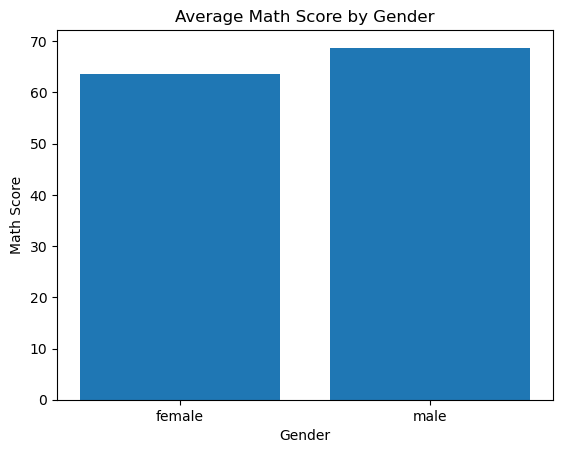

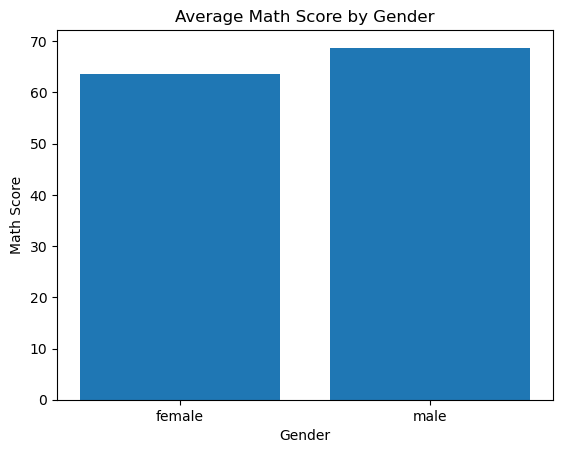

In [31]:
def math_bar_plot(df_data: pd.DataFrame):
    df = df_data.copy()
    grouped_df = df.groupby('gender')['math score'].mean()
    
    fig, ax = plt.subplots()
    ax.bar(grouped_df.index, grouped_df.values)
    
    ax.set_title('Average Math Score by Gender')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Math Score')
    
    return fig


In [ ]:
''' 
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan histogramot,
ami vizualizálja az elért írásbeli pontszámokat.

A histogram címe legyen: 'Distribution of Writing Scores'
Az x tengely címe legyen: 'Writing Score'
Az y tengely címe legyen: 'Number of Students'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: writing_hist
'''

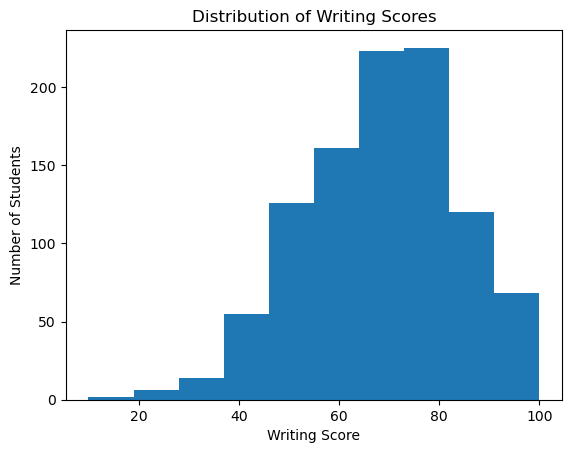

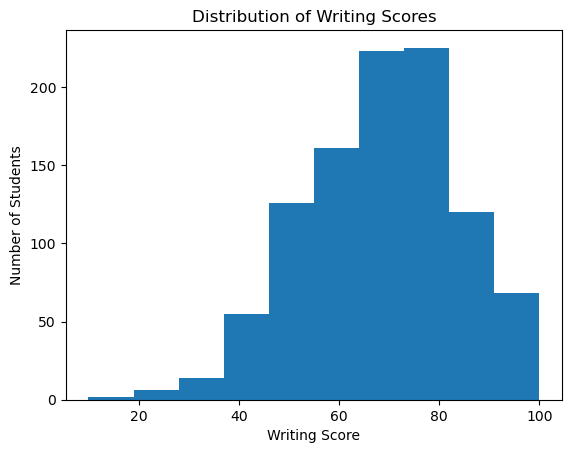

In [35]:
def writing_hist(df: pd.DataFrame):
    fig, ax = plt.subplots()
    ax.hist(df['writing score'])
    ax.set_title('Distribution of Writing Scores')
    ax.set_xlabel('Writing Score')
    ax.set_ylabel('Number of Students')
    return fig



In [ ]:
''' 
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan kördiagramot,
ami vizualizálja a diákok etnikum csoportok szerinti eloszlását százalékosan.

Érdemes megszámolni a diákok számát, etnikum csoportonként,majd a százalékos kirajzolást az autopct='%1.1f%%' paraméterrel megadható.
Mindegyik kör szelethez tartozzon egy címke, ami a csoport nevét tartalmazza.
A diagram címe legyen: 'Proportion of Students by Race/Ethnicity'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: ethnicity_pie_chart
'''

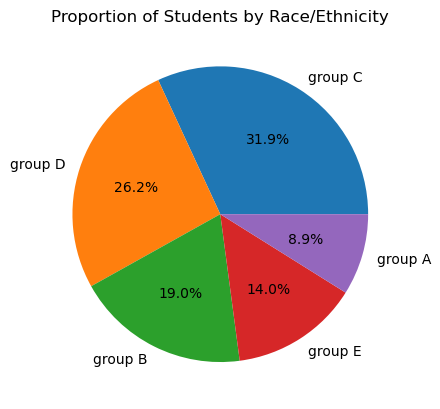

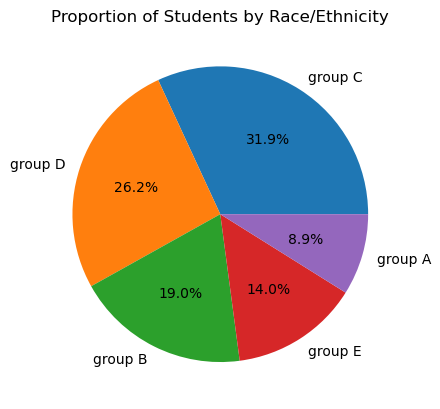

In [36]:
def ethnicity_pie_chart(df: pd.DataFrame):
    # Count number of students in each ethnicity group
    ethnicity_counts = df['race/ethnicity'].value_counts()
    total_students = len(df)
    
    # Calculate percentage for each group
    percentages = [100 * count / total_students for count in ethnicity_counts]
    
    # Create pie chart with labels and percentages
    fig, ax = plt.subplots()
    ax.pie(percentages, labels=ethnicity_counts.index, autopct='%1.1f%%')
    ax.set_title('Proportion of Students by Race/Ethnicity')
    
    return fig
